In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_teams_full = pd.read_csv('data/teams_fifa22.csv')
df_players_full = pd.read_csv('data/players_fifa22.csv')

In [3]:
df_teams_full

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1,Arsenal,English Premier League (1),13,79,83,81,77,77500000,7,7,33,25.1,23.2
1,2,Aston Villa,English Premier League (1),13,78,79,76,77,37500000,4,3,31,24.7,23.3
2,1925,Brentford,English Premier League (1),13,73,73,74,73,18000000,1,1,33,24.7,23.4
3,1808,Brighton & Hove Albion,English Premier League (1),13,76,75,77,75,28000000,2,1,33,26.9,23.5
4,1796,Burnley,English Premier League (1),13,76,76,76,77,22000000,2,1,33,28.6,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,114611,Academia Puerto Cabello,Venezuelan Primera División (1),2019,63,64,63,62,1500000,1,1,27,27.4,24.5
730,112916,Aragua Fútbol Club,Venezuelan Primera División (1),2019,63,63,62,61,1400000,3,3,28,27.4,25.5
731,112853,Deportivo La Guaira FC,Venezuelan Primera División (1),2019,66,65,66,65,1200000,4,1,28,26.6,25.6
732,110990,Deportivo Táchira FC,Venezuelan Primera División (1),2019,63,65,63,63,1900000,6,4,27,27.7,26.1


In [4]:
df_teams_full.describe()

,ID,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,7.340000e+02,734.00000,734.000000,734.000000,734.000000,734.000000
mean,49807.358311,312.163488,68.878747,69.350136,68.908719,68.181199,9.032819e+06,5.50545,2.728883,27.209809,26.755177,25.284741
std,54354.884897,596.232032,5.286371,5.715518,5.345228,5.287492,1.779685e+07,2.86425,2.215242,2.912009,1.703706,1.474471
min,1.000000,1.000000,55.000000,55.000000,55.000000,55.000000,0.000000e+00,1.00000,1.000000,19.000000,20.600000,20.100000
25%,581.500000,20.000000,65.000000,65.000000,65.000000,64.000000,1.700000e+06,3.00000,1.000000,26.000000,25.600000,24.300000
50%,1928.500000,61.000000,68.000000,69.000000,68.000000,68.000000,3.500000e+06,5.00000,2.000000,28.000000,26.800000,25.300000
75%,111127.500000,336.000000,72.000000,73.000000,72.000000,71.000000,8.500000e+06,8.00000,4.000000,29.000000,27.900000,26.300000
max,115820.000000,2149.000000,86.000000,92.000000,86.000000,86.000000,1.760000e+08,10.00000,10.000000,33.000000,32.100000,30.200000


In [5]:
df_players_full

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,https://cdn.sofifa.com/players/250/978/22_60.png,China PR,48,52,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17


In [6]:
df_players_full.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,1.926000e+04,...,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000
mean,231682.741952,25.184683,181.305036,74.950779,65.815628,71.100104,5.284476,1598.525909,357.062461,2.857652e+06,...,58.364434,57.227207,58.364434,56.197040,55.771340,56.197040,55.539823,54.379595,55.539823,23.242939
std,26960.272515,4.737340,6.866151,7.066864,6.817297,6.092103,5.472201,271.575855,39.910613,7.604532e+06,...,13.989045,13.212152,13.989045,13.818416,13.856922,13.818416,14.063862,14.678658,14.063862,15.053823
min,41.000000,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000,767.000000,227.000000,0.000000e+00,...,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,16.000000,18.000000,16.000000,10.000000
25%,214903.500000,21.000000,176.000000,70.000000,62.000000,67.000000,0.000000,1462.000000,329.000000,4.750000e+05,...,54.000000,52.000000,54.000000,51.000000,48.000000,51.000000,49.000000,44.000000,49.000000,17.000000
50%,236687.500000,25.000000,181.000000,75.000000,66.000000,71.000000,4.000000,1633.000000,358.000000,9.750000e+05,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,253607.500000,29.000000,186.000000,80.000000,70.000000,75.000000,9.000000,1782.000000,384.000000,2.000000e+06,...,67.000000,66.000000,67.000000,65.000000,66.000000,65.000000,65.000000,66.000000,65.000000,20.000000
max,264705.000000,54.000000,206.000000,110.000000,93.000000,95.000000,26.000000,2341.000000,501.000000,1.940000e+08,...,93.000000,91.000000,93.000000,88.000000,90.000000,88.000000,88.000000,89.000000,88.000000,92.000000


# Null Columns
You can see there are several null columns in players dataset:

In [7]:
null_summary = df_players_full.isna().sum()
null_cols_with_count = null_summary[null_summary > 0]
null_cols_with_count

ClubPosition           76
ContractUntil          76
ClubNumber             76
NationalPosition    18503
NationalNumber      18503
dtype: int64

Because the columns `ClubPosition`, `ContractUntil`, and `ClubNumber` have exactly the same number of NULL values, I can assume that these are the rows of players whose contracts with their clubs have expired and who have not yet signed contracts with other clubs.

Regarding `NationalPosition` and `NationalNumber`, I think these are players who were not called up to the national team this year (or have never been called up / are not part of the national team setup).

# Filtering table

Since the table has a lot of columns and not all of them are important, I decided to filter it and keep only the data that I consider relevant:

1. Player Identity & Demographics
    - Name: The short name of the player (e.g., "L. Messi").
    - Age: Player's age in years.
    - Height: Player's height (in cm).
    - Weight: Player's weight (in kg).
    - Nationality: The country the player represents.
    - PreferredFoot: Indicates if the player is Left or Right-footed.

2. General Ratings
    - Overall: The main rating of the player's current ability (0-99).
    - Potential: The maximum rating the player can achieve in the future.
    - Growth: The difference between Potential and Overall (Potential - Overall).

3. Club & Contract Info
    - Club: The name of the team the player currently plays for.
    - ValueEUR: The market value of the player in Euros.
    - WageEUR: The weekly salary of the player in Euros.
    - ReleaseClause: The amount a club must pay to bypass negotiations (Buyout clause).
    - BestPosition: The theoretical best position for the player based on their stats.

4. Detailed Skills & Attributes
    - AttackingWorkRate: Effort level in attack (Low/Medium/High).
    - DefensiveWorkRate: Effort level in defense (Low/Medium/High).
    - PaceTotal: Summary of speed.
    - ShootingTotal: Summary of shooting ability.
    - PassingTotal: Summary of passing ability.
    - DribblingTotal: Summary of dribbling ability.
    - DefendingTotal: Summary of defensive ability.
    - PhysicalityTotal: Summary of physical strength and stamina.


In [8]:
selected_features = [
    'Name', 'Age', 'Nationality', 'Height', 'Weight', 'Club',
    'Overall', 'Potential', 'Growth',
    'ValueEUR', 'WageEUR', 'ReleaseClause',
    'BestPosition', 'PreferredFoot', 'AttackingWorkRate','DefensiveWorkRate',
    'PaceTotal', 'ShootingTotal', 'PassingTotal',
    'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'
]

df_players = df_players_full[selected_features].copy()

In [9]:
df_players.shape

(19260, 22)

In [10]:
df_players.head()

,Name,Age,Nationality,Height,Weight,Club,Overall,Potential,Growth,ValueEUR,...,BestPosition,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,Argentina,170,72,Paris Saint-Germain,93,93,0,78000000,...,RW,Left,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,Poland,185,81,FC Bayern München,92,92,0,119500000,...,ST,Right,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,Portugal,187,83,Manchester United,91,91,0,45000000,...,ST,Right,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,France,182,73,Paris Saint-Germain,91,95,4,194000000,...,ST,Right,High,Low,97,88,80,92,36,77
4,J. Oblak,28,Slovenia,188,87,Atlético de Madrid,91,93,2,112000000,...,GK,Right,Medium,Medium,87,92,78,90,52,90


In [11]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Nationality        19260 non-null  object
 3   Height             19260 non-null  int64 
 4   Weight             19260 non-null  int64 
 5   Club               19260 non-null  object
 6   Overall            19260 non-null  int64 
 7   Potential          19260 non-null  int64 
 8   Growth             19260 non-null  int64 
 9   ValueEUR           19260 non-null  int64 
 10  WageEUR            19260 non-null  int64 
 11  ReleaseClause      19260 non-null  int64 
 12  BestPosition       19260 non-null  object
 13  PreferredFoot      19260 non-null  object
 14  AttackingWorkRate  19260 non-null  object
 15  DefensiveWorkRate  19260 non-null  object
 16  PaceTotal          19260 non-null  int64

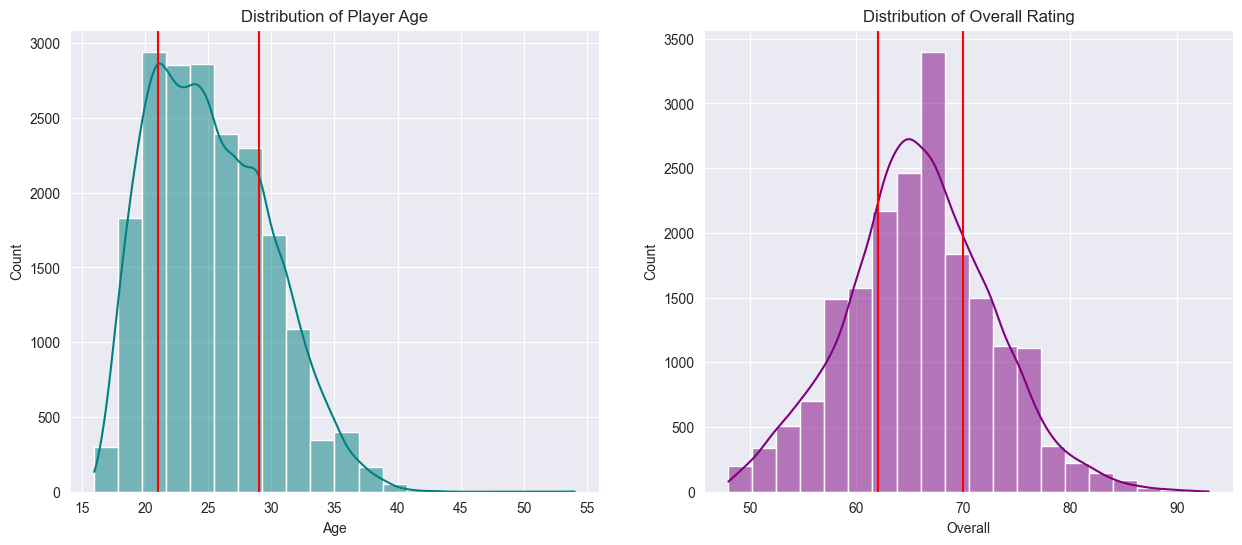

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df_players, x='Age', kde=True, bins=20, color='teal', ax=ax[0])
ax[0].set_title('Distribution of Player Age')
ax[0].axvline(df_players['Age'].quantile(0.25), color='red')
ax[0].axvline(df_players['Age'].quantile(0.75), color='red')

sns.histplot(data=df_players, x='Overall', kde=True, bins=20, color='purple', ax=ax[1])
ax[1].set_title('Distribution of Overall Rating')
ax[1].axvline(df_players['Overall'].quantile(0.25), color='red')
ax[1].axvline(df_players['Overall'].quantile(0.75), color='red')

plt.show()

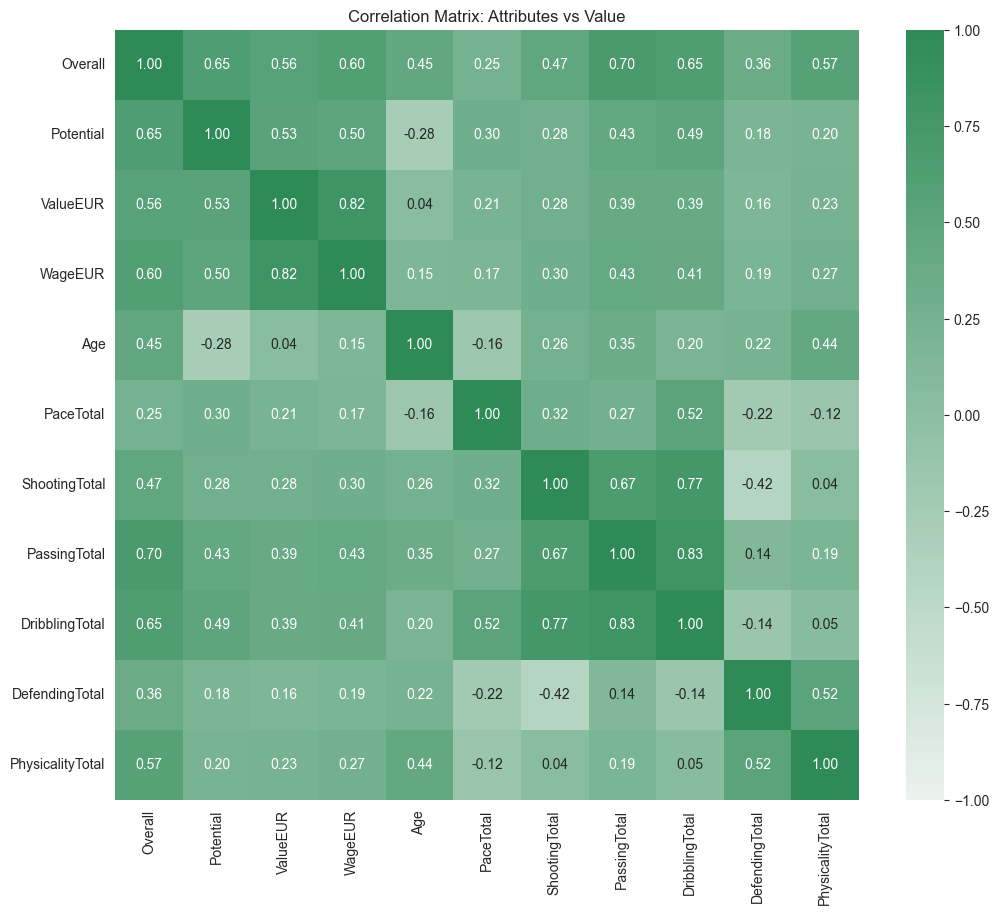

In [13]:
corr_columns = ['Overall', 'Potential', 'ValueEUR', 'WageEUR', 'Age',
                'PaceTotal', 'ShootingTotal', 'PassingTotal',
                'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_players[corr_columns].corr(), annot=True, fmt='.2f', cmap=sns.light_palette("seagreen", as_cmap=True), vmin=-1, vmax=1)
plt.title('Correlation Matrix: Attributes vs Value')
plt.show()

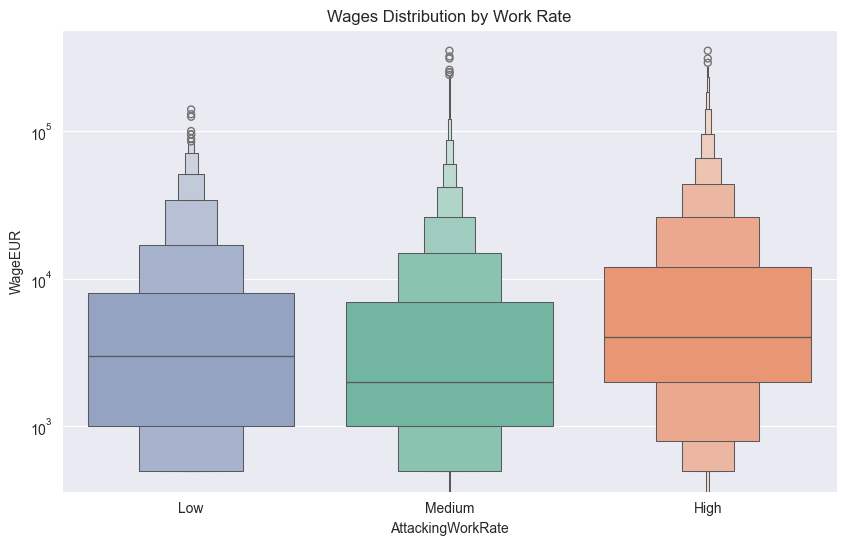

In [24]:
plt.figure(figsize=(10, 6))

sns.boxenplot(
    data=df_players,
    x='AttackingWorkRate',
    y='WageEUR',
    hue='AttackingWorkRate',
    legend=False,
    order=['Low', 'Medium', 'High'],
    palette='Set2'
)

plt.yscale('log')
plt.title('Wages Distribution by Work Rate')
plt.show()

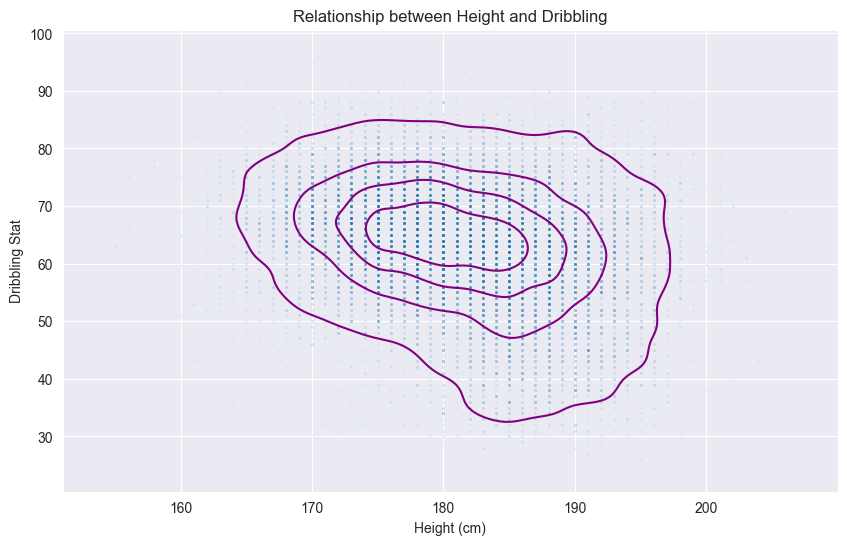

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_players, x='Height', y='DribblingTotal', alpha=0.05, s=5)
sns.kdeplot(data=df_players, x='Height', y='DribblingTotal', color='purple', levels=5)
plt.title('Relationship between Height and Dribbling')
plt.xlabel('Height (cm)')
plt.ylabel('Dribbling Stat')
plt.show()